## **Latar Belakang**
Investor ingin berinvestasi pada bidang transportasi, khususnya pada transportasi umum yang terdapat di kota Jakarta. Terdapat beberapa pilihan transportasi yang dapat di jadikan target investasi.

## **Pernyataan Masalah**
Investor ini ingin mengetahui jenis transportasi apa yang berpotensi tinggi untuk dijadikan target investasi. Infromasi ini akan membatu investor dalam mengambil keputusan akhir untuk investasi, dan dapat memberikan informasi alokasi dana investasi yang potensial.

##### **Batasan Masalah**
Hanya data tahun 2021 dimana pada tahun tersebut sedang terjadi wabah covid-19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\purwadhika\modul2\CapstoneProject2\data\processed\TransJakartaPassengers2021.csv')
df.head(10)

,Unnamed: 0,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,kategory_penumpang
0,0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197,sepi penumpang (Mikrotrans)
1,1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711,sepi penumpang (Mikrotrans)
2,2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186,sepi penumpang (Mikrotrans)
3,3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883,sepi penumpang (Mikrotrans)
4,4,2021,10,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,66616,sepi penumpang (Mikrotrans)
5,5,2021,10,Mikrotrans,JAK.75,Cililitan - Kp. Pulo,50363,sepi penumpang (Mikrotrans)
6,6,2021,10,Mikrotrans,JAK.74,Terminal Rawamangun - Cipinang Muara,50676,sepi penumpang (Mikrotrans)
7,7,2021,10,Mikrotrans,JAK.73,Jambore Cibubur - Pasar Rebo,75846,sepi penumpang (Mikrotrans)
8,8,2021,10,Mikrotrans,JAK.72,Kampung Rambutan - Pasar Rebo via Poncol,97831,sepi penumpang (Mikrotrans)
9,9,2021,10,Mikrotrans,JAK.71,Kampung Rambutan - Pinang Ranti,57649,sepi penumpang (Mikrotrans)


#### **Perbandingan Jumlah Penumpang Pada Setiap Jenis Transportasi**

c:\Users\Hp\.pyenv\pyenv-win\versions\3.9.13\lib\site-packages\seaborn\algorithms.py:76: UserWarning: Data contain nans but no nan-aware version of `size` found
  warnings.warn(msg, UserWarning)


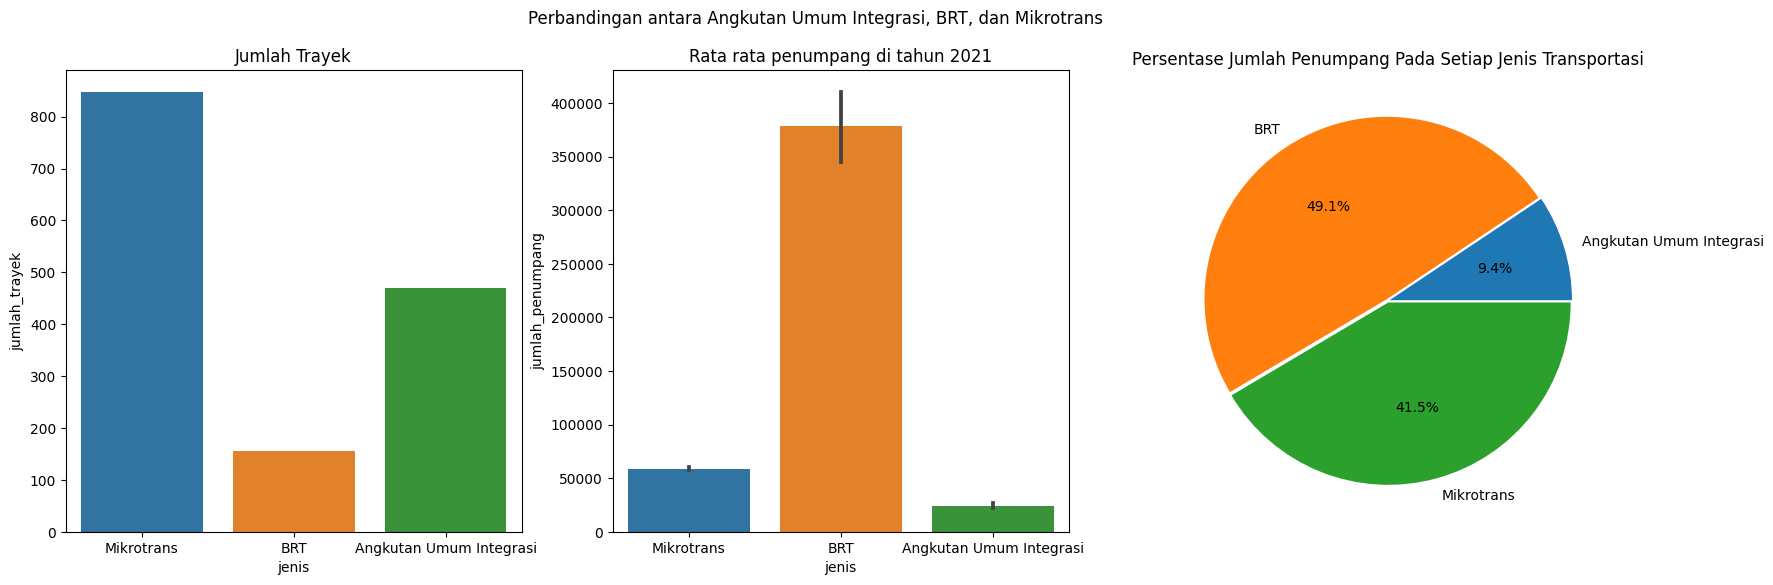

In [16]:
df['jumlah_trayek'] = df['jenis'].value_counts()
df_jenis = df[['jenis', 'jumlah_penumpang']].groupby('jenis').sum().reset_index()
df_jenis['persentase_penumpang'] = df_jenis['jumlah_penumpang'] / df_jenis['jumlah_penumpang'].sum() *100

# figure disimpan dalam variable
fig = plt.figure(figsize=(20,6))

# judul untuk figure
fig.suptitle('Perbandingan antara Angkutan Umum Integrasi, BRT, dan Mikrotrans')

# Barplot
plt.subplot(1,3,2) #baris, colom, index
sns.barplot(data=df, x='jenis', y='jumlah_penumpang')
plt.title('Rata rata penumpang di tahun 2021') # judul untuk subplot

# Scatterplot
plt.subplot(1,3,1)
sns.barplot(data=df, x='jenis', y='jumlah_trayek',  estimator=len)
plt.title('Jumlah Trayek') # judul untuk subplot

# Piechart
plt.subplot(1,3,3)
plt.pie(
    x=df_jenis['persentase_penumpang'],  # isi dengan kolom numerical
    labels= df_jenis['jenis'],      # isi dengan kolom categorical
    autopct='%1.1f%%',                    # label percentage
    explode= (0.01, 0.01, 0.01)
)
plt.title('Persentase Jumlah Penumpang Pada Setiap Jenis Transportasi')

plt.show()

#print(df['jenis'].value_counts())
#df_jenis


##### Insight
Dari visualisasi diatas dapat disimpulkan dari tiga jenis transpotasi yang ada yaitu Angkutan Umum Integrasi, BRT, dan Mikrotrans, BRT merupakan jenis transportasi yang paling banyak jumlah penumpangnya, walaupun dengan jumlah trayek paling sedikit. Diikuti oleh Mikrotrans dengan jumlah penumpang terbanyak kedua dan jumlah trayek terbanyak. Angkutan Umum integrasi dengan jumlah penumpang paling sedikit

#### **Rata-rata Jumlah penumpang per bulan setiap jenis transportasi**

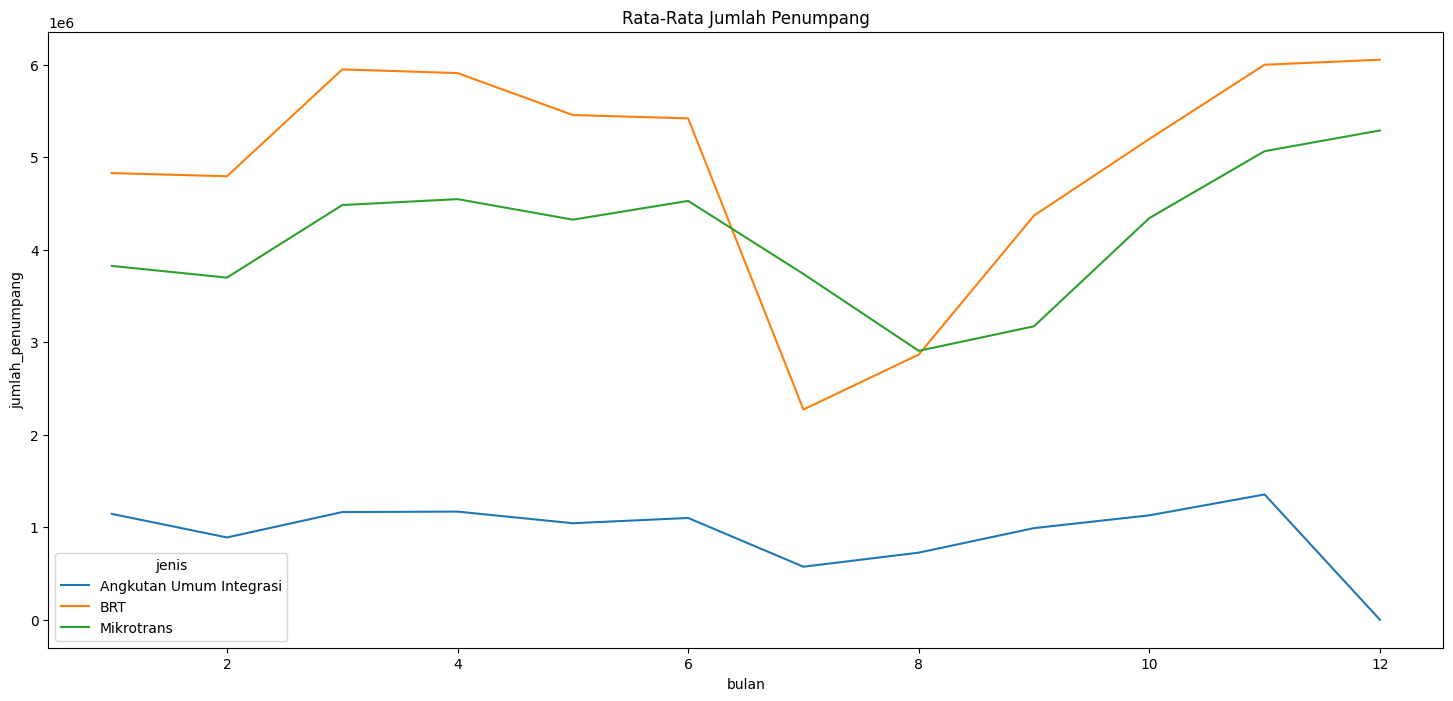

In [15]:
dfperBulan = df.groupby(['bulan', 'jenis'])['jumlah_penumpang'].sum().reset_index()

# Create the plot
plt.figure(figsize=(18, 8))  # Adjust the size of the plot as per your requirements
sns.lineplot(data=dfperBulan, x='bulan', y='jumlah_penumpang', hue='jenis')

# Set title and labels
plt.title('Rata-Rata Jumlah Penumpang')

plt.show()

##### Insight
Dari grafik di atas terlihat bahwa terjadi kenaikan dan penurunan setiap bulannya pada setiap jenis transportasi
1. Pada jenis transportasi BRT terlihat adanya penurunan jumlah penumpang paling drastis yang terjadi pada bulan Juli. Dan pada bulan selanjutnya terjadi tren kenaikan jumlah penumpang sampai bulan Desember.
2. Pada jenis transportasi Mikrotrans juga terdapat penurunan jumlah penumpang yang cukup signifikan yang terjadi di bulan Juli. Dan pada bulan selanjutnya terjadi tren kenaikan jumlah penumpang sampai bulan Desember.
3. Pada jenis transportasi Angkutan Umum Integrasi kenaikan dan penurunan jumlah penumpang cenderung tidak signifikan. Tapi pada bulan Desember terkadi penurunan jumlah penumpang yang sangat signifikan.

Pada bulan Juli sampai dengan Agustus diberlakukan PPKM karena tingginya kasus kematian akibat Covid-19, hal tersebut berdampak signifikan pada penurunan jumlah penumpang pada jenis transportasi BRT dan Mikrotrans.

Pada tahun 2021 Suku Dinas Perhubungan melakukan pemberlakuan stop operasional dikarenakan awak kendaraan melanggar ketentuan operasional kendaraan meliputi kendaraan tak layak operasional, menaik turunkan penumpang bukan pada tempatnya, trayek tidak sesuai, hingga habis masa berlaku atau tidak memiliki Surat Tanda Uji Kendaraan (STUK). Hal tersebut berdampak pada penurunan jumlah penumpang yang signifikan pada jenis kendaraan Angkutan Umum integrasi pada akhir tahun 2021.

#### **10 Rute Dengan Jumlah Penumpang Terbanyak pad setiap jenis transportasi**

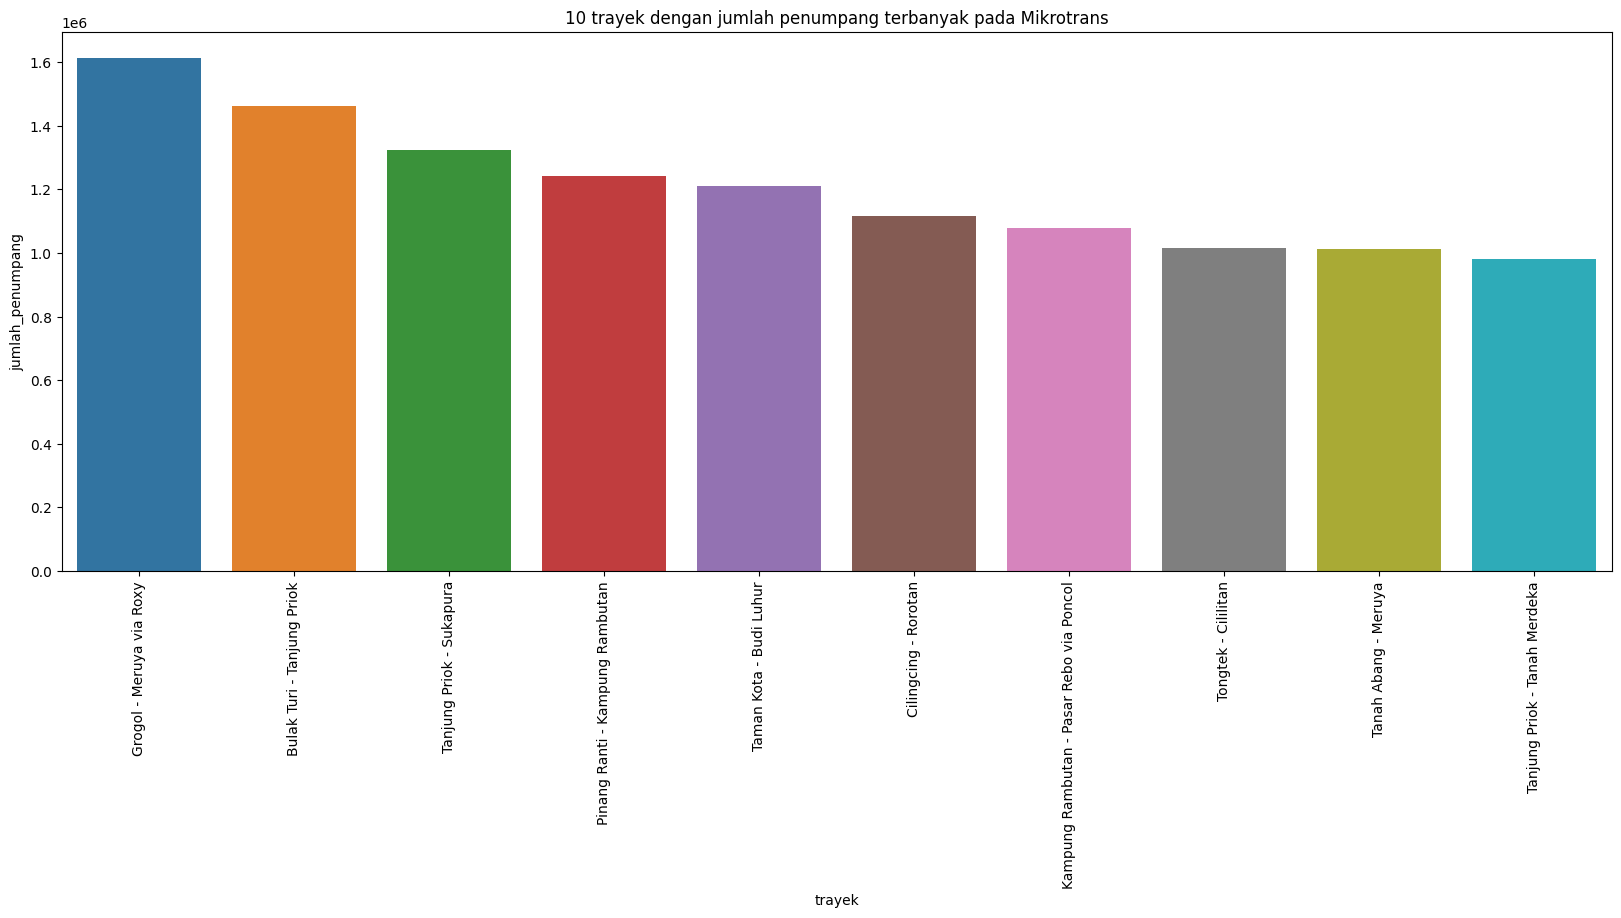

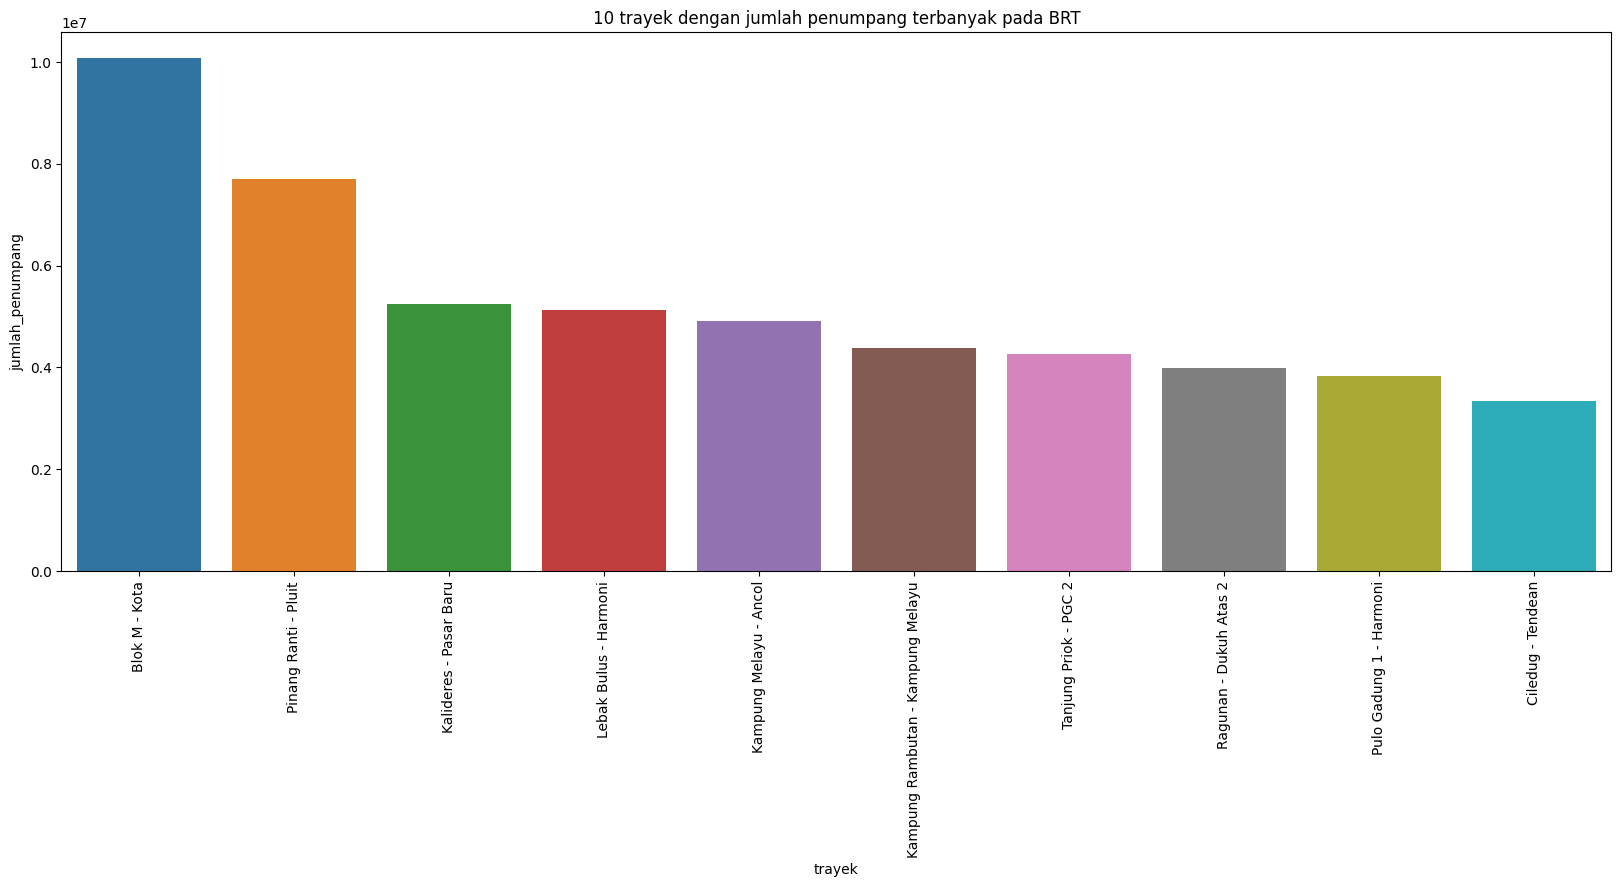

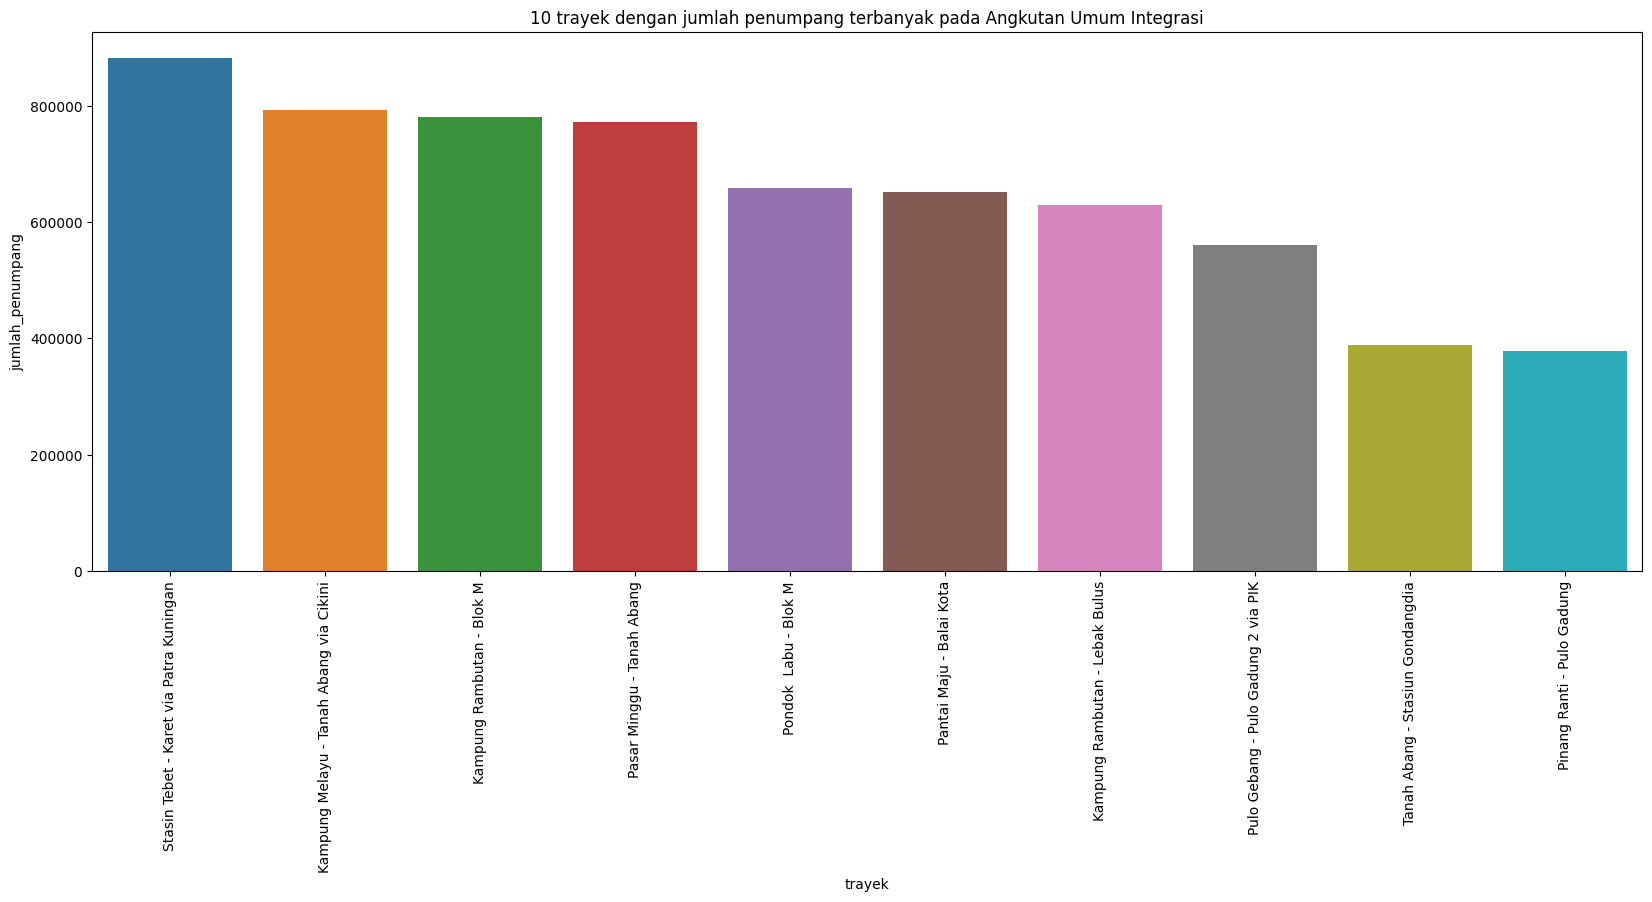

In [19]:
df_trayek = df.groupby(['jenis', 'trayek'])['jumlah_penumpang'].sum().reset_index()

def trayek10(jenis_trans):
    return df_trayek[df_trayek['jenis'] == jenis_trans].nlargest(10, 'jumlah_penumpang')

jenis_trans = df['jenis'].unique()

for trans in jenis_trans:
    terbesar10 = trayek10(trans)
    plt.figure(figsize=(20,7))
    sns.barplot(data=terbesar10, x='trayek', y='jumlah_penumpang')
    plt.xticks(rotation = 90)
    plt.title(f'10 trayek dengan jumlah penumpang terbanyak pada {trans}')
    #plt.ylabel('Total Passengers')
    plt.show()

##### Insight

1. *Mikrotrans.*
Pada jenis transportasi Mikrotrans, trayek dengan jumlah penumpang terbanyak adalah trayek Grogol - Meruya via Roxy dengan jumlah penumpang mencapai 1.600.000 penumpang pada tahun 2021. Dan Trayek Tanjung Priok - Tanah Merdeka berada pada peringkat 10 teratas dengan jumlah penumpang mencapai 1.000.000 penumpang.
2. *BRT.*
Pada jenis transportasi BRT, trayek dengan jumlah penumpang terbanyak adalah trayek Blok M - Kota dengan jumlah penumpang mencapai 10.000.000 penumpang pada tahun 2021. Dan Trayek Ciledug - Tendean berada pada peringkat 10 teratas dengan jumlah penumpang mencapai hampir 4.000.000 penumpang.
3. *Angkutan Umum Integrasi.*
Pada jenis transportasi Angkutan Umum Integrasi, trayek dengan jumlah penumpang terbanyak adalah trayek Stasium Tebet - Karet via Patra kuningan dengan jumlah penumpang hampir  mencapai 900.000 penumpang pada tahun 2021. Dan Trayek Pinang Ranti - Pulo Gadung berada pada peringkat 10 teratas dengan jumlah penumpang mencapai 400.000 penumpang



#### **Kesimpulan**
Berdasarkan analisis data Transjakarta passenger 2021, terdapat tiga jenis transportasi yaitu Angkutan Umum Integrasi, BRT, dan Mikrotrans. Meskipun BRT memiliki jumlah trayek yang paling rendah, Tetapi BRT mendapat jumlah penumpang yang paling tinggi pada tahun tersebut, lalu diikuti oleh Mikrotrans yang memiliki rute terbanyak, dan Angkutan Umum Integrasi yang mendapat jumlah penumpang paling rendah. 
Pada bulan Juli sampai dengan Agustus diberlakukan PPKM karena tingginya kasus kematian akibat Covid-19, hal tersebut berdampak pada penurunan jumlah penumpang. Yang paling signifikan adalah jenis transportasi BRT dan Mikrotrans


#### **Rekomendasi**
Dari Pertimbangan Jumlah penumpang, BRT adalah targer investasi yang paling baik dibandingan dengan Mikrotrans dan Angkutan Umum integrasi. Tetapi investor juga harus mempertimbangkan dari segi lain seperti modal awal armada dan perawatan berkala armada yang pasti berbeda antara tiga jenis transportasi tersebut. Jika memang BRT adalah target investasi terbaik, maka dana investasi dapat di alokasikan pada trayek-trayek tertentu padat penumpang dengan cara menambah armada agar dapat menaikkan jumlah penumpang.